In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix 
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

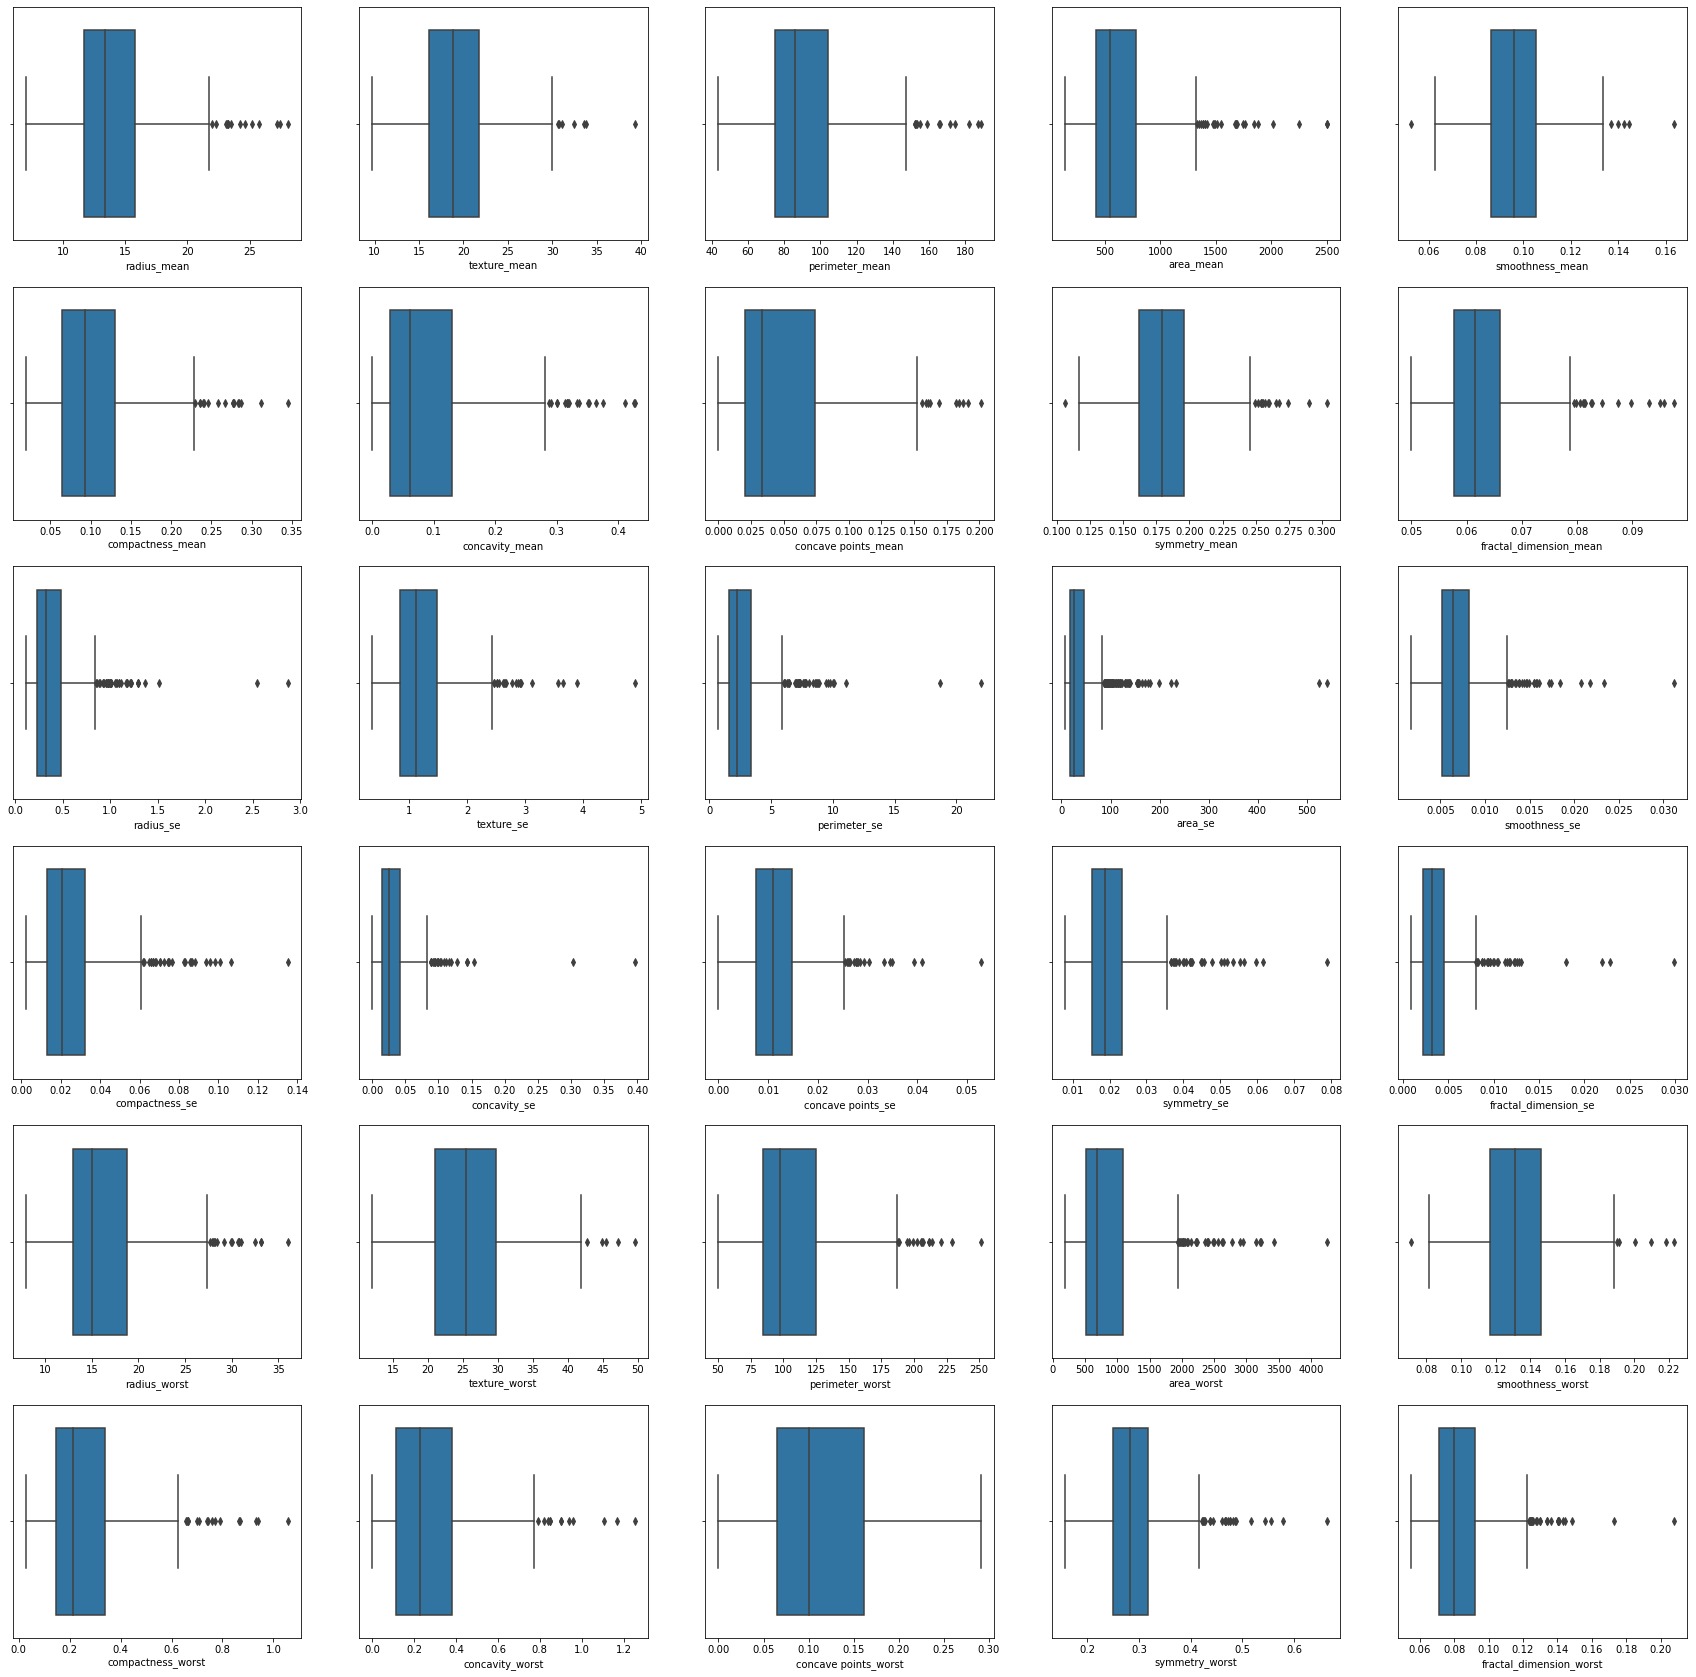

In [7]:
num=len(df.columns)
column=2
fig , axes = plt.subplots(6,5,figsize=(30,30))
for i in range(6):
    for j in range(5):
        sns.boxplot(df.iloc[:,column],ax=axes[i,j])
        column+=1
plt.show()

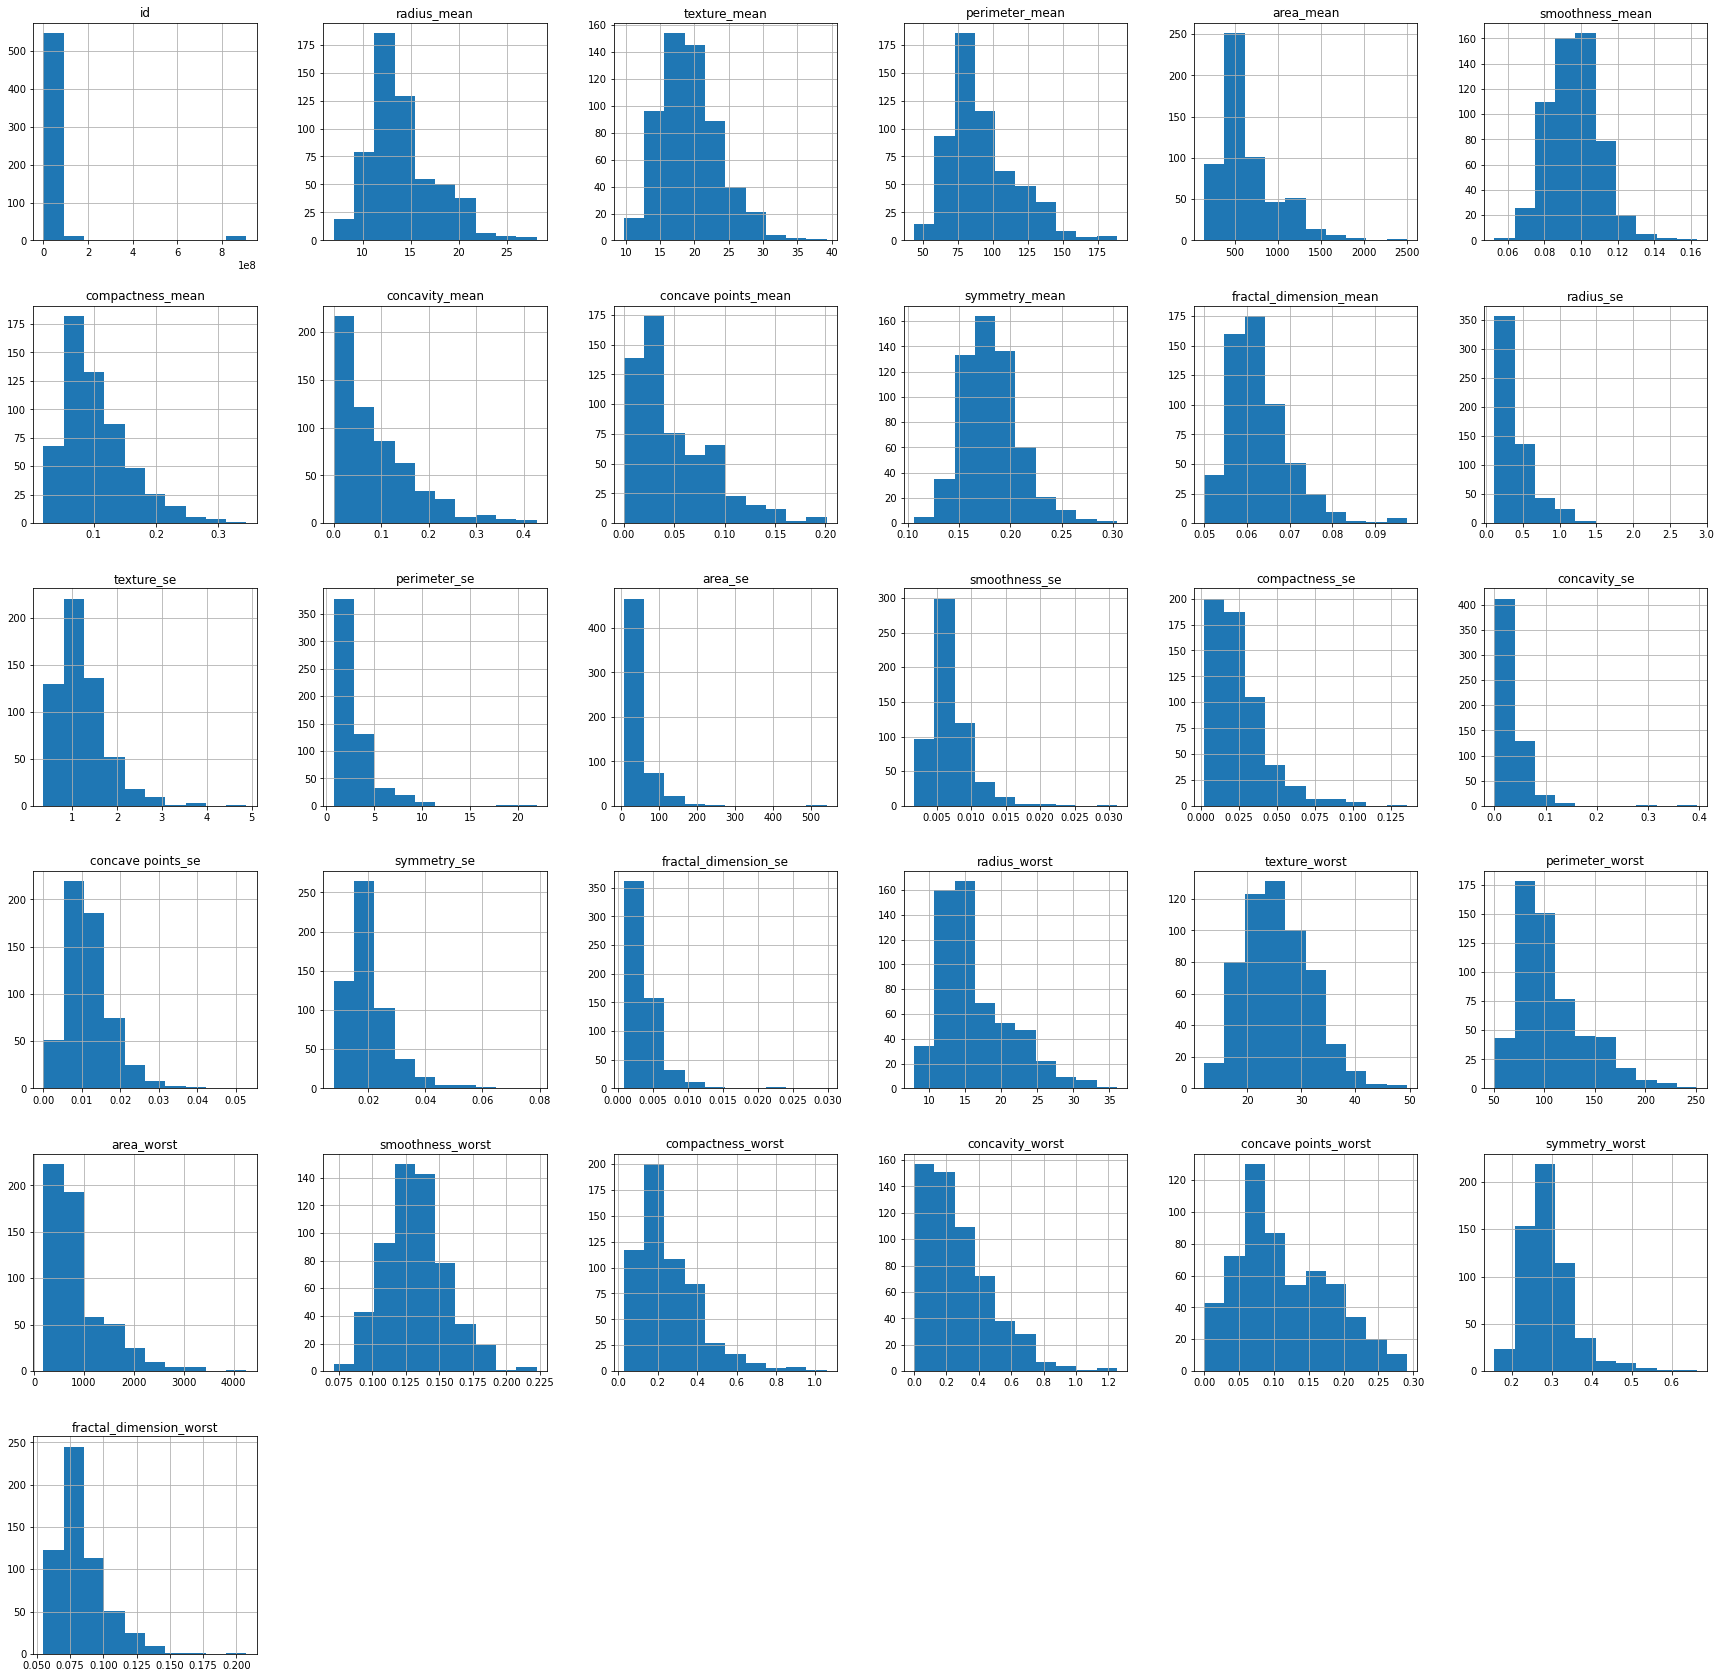

In [8]:
df.hist(figsize=(30,30))
plt.show()

## we have 8 columns that have a high scale compared to other features so we have to normalize them 


In [9]:
df["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

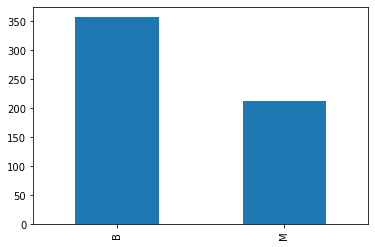

In [10]:
df["diagnosis"].value_counts().plot(kind="bar")


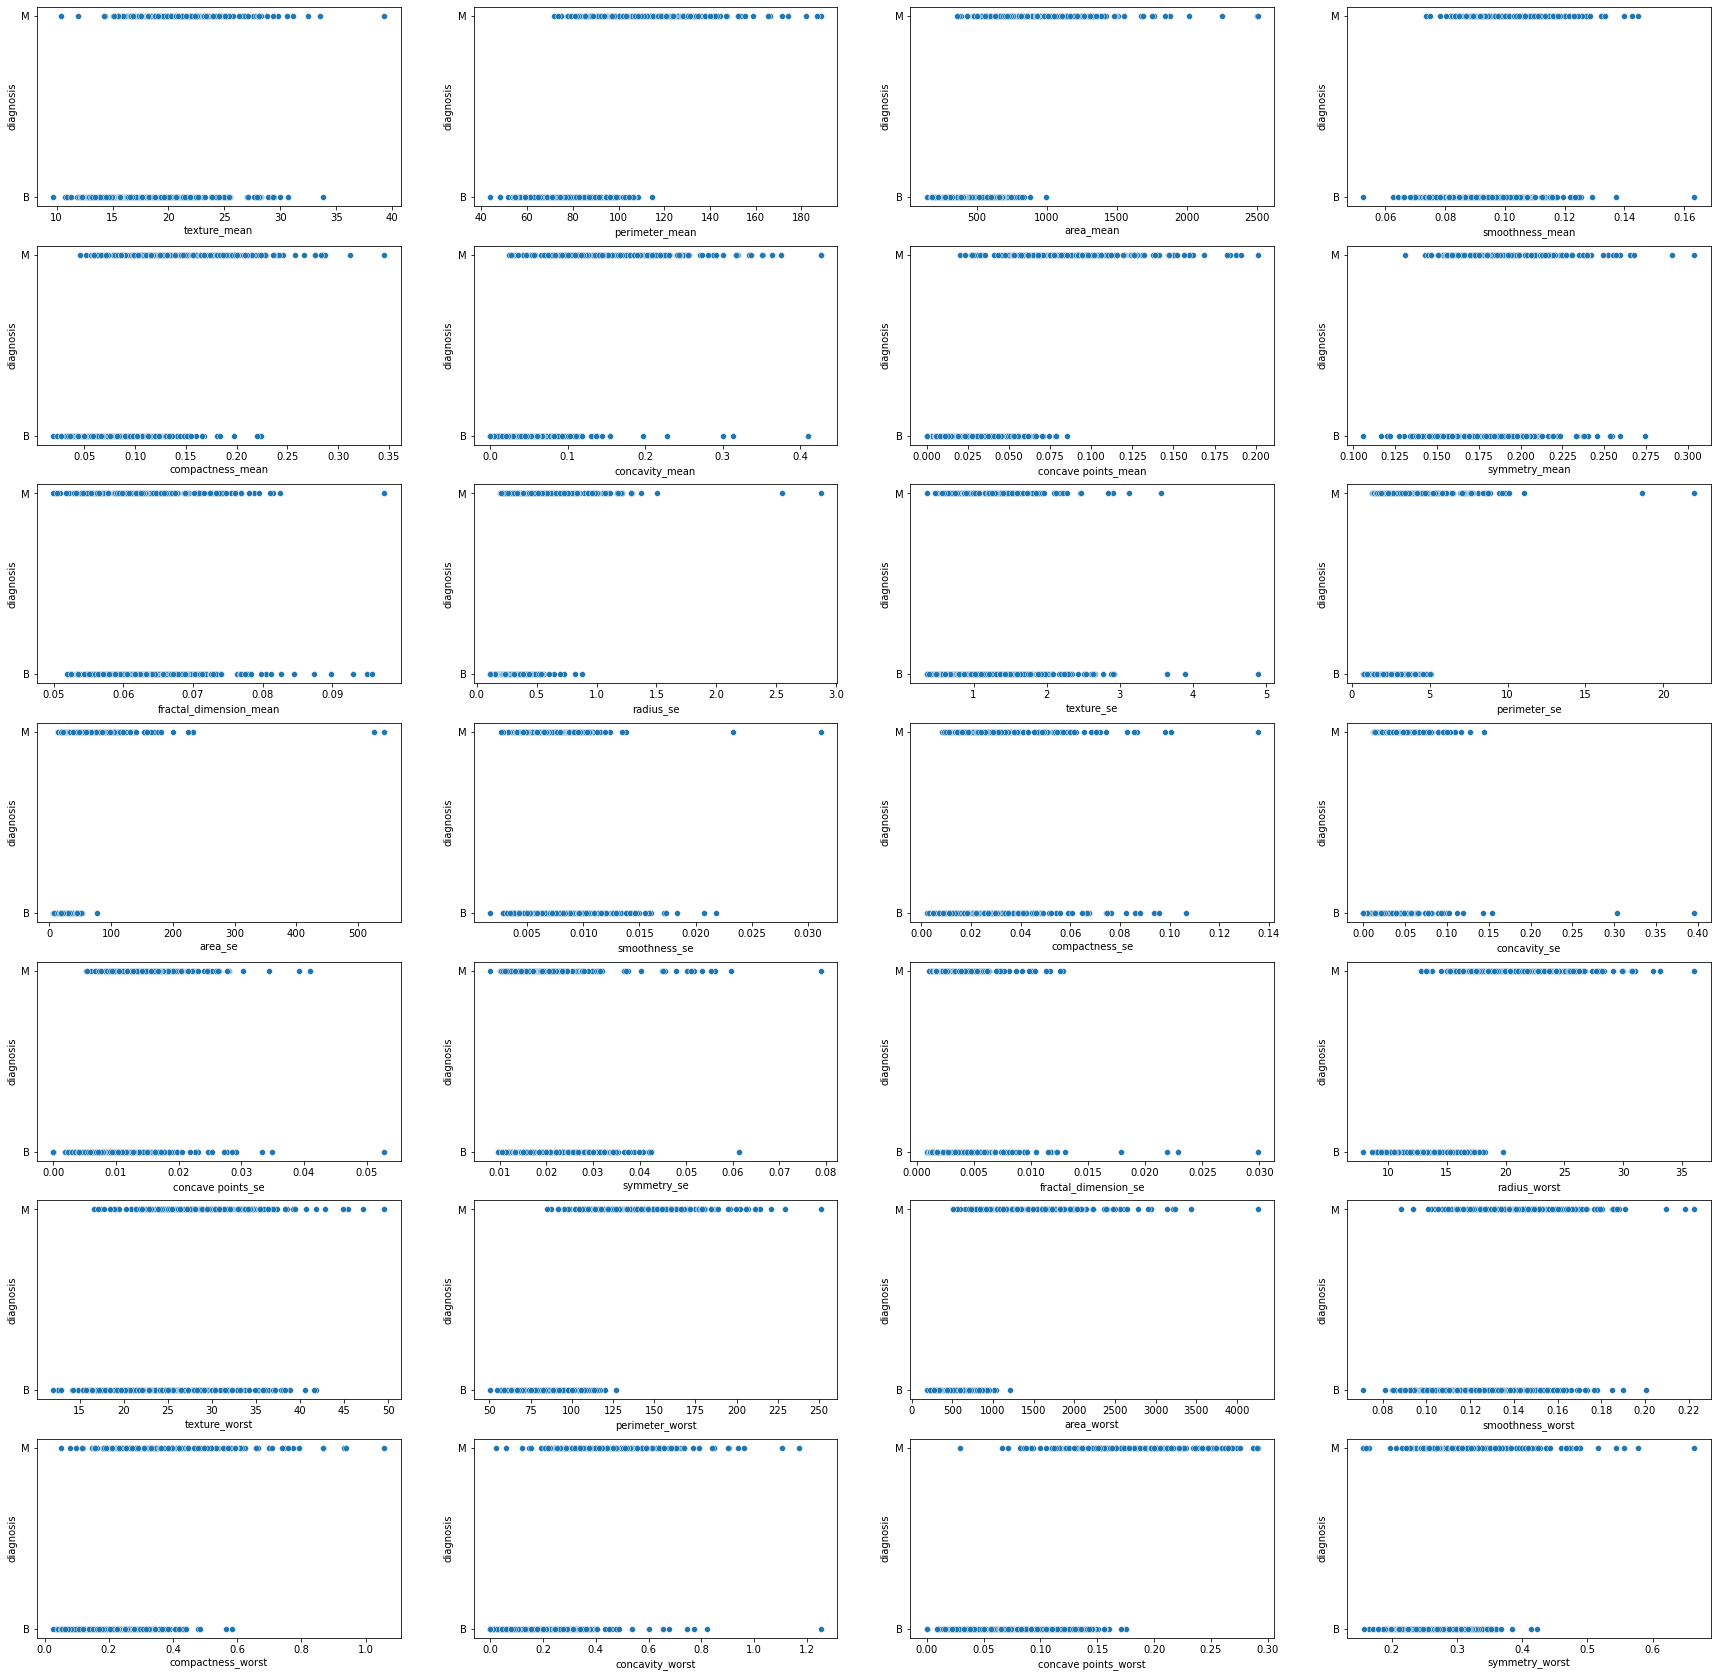

In [11]:
column=3
fig , axes = plt.subplots(7,4,figsize=(30,30))
for i in range(7):
    for j in range(4):
        sns.scatterplot(x=df.iloc[:,column],y=df.iloc[:,1],ax=axes[i,j])
        column+=1
plt.show()

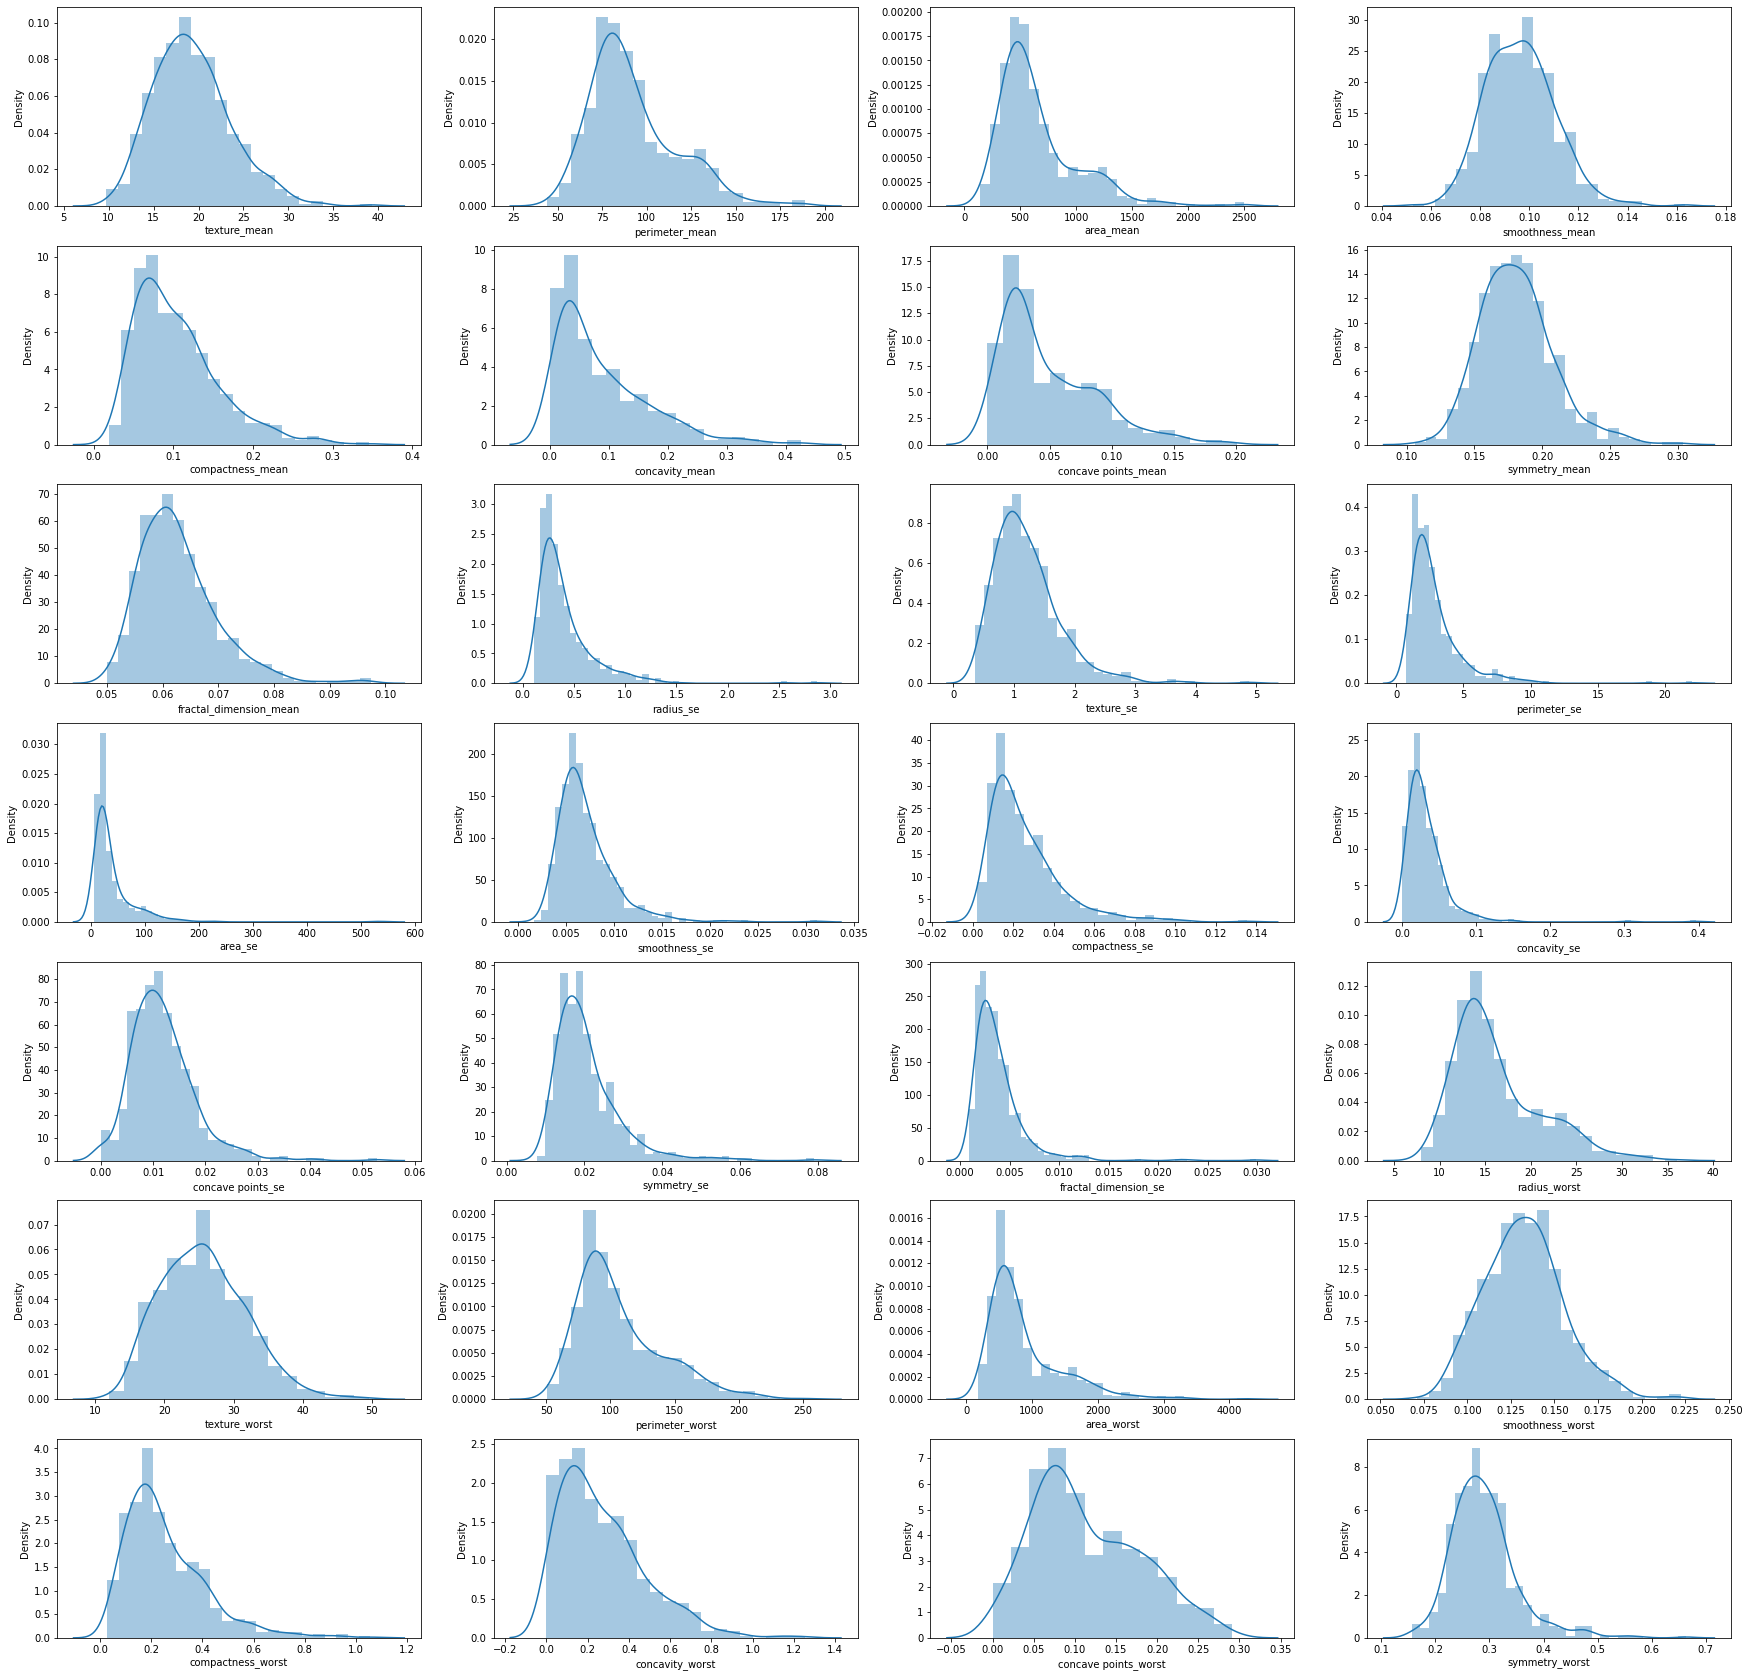

In [12]:
column=3
fig , axes = plt.subplots(7,4,figsize=(30,30))
for i in range(7):
    for j in range(4):
        sns.distplot(df.iloc[:,column],ax=axes[i,j])
        column+=1
plt.show()

In [13]:
df["diagnosis"]=df["diagnosis"].replace(("M","B"),(0,1))

In [14]:
df["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [15]:
x=df.drop(["id","diagnosis"],axis=1)
y=df[["diagnosis"]]

<AxesSubplot:>

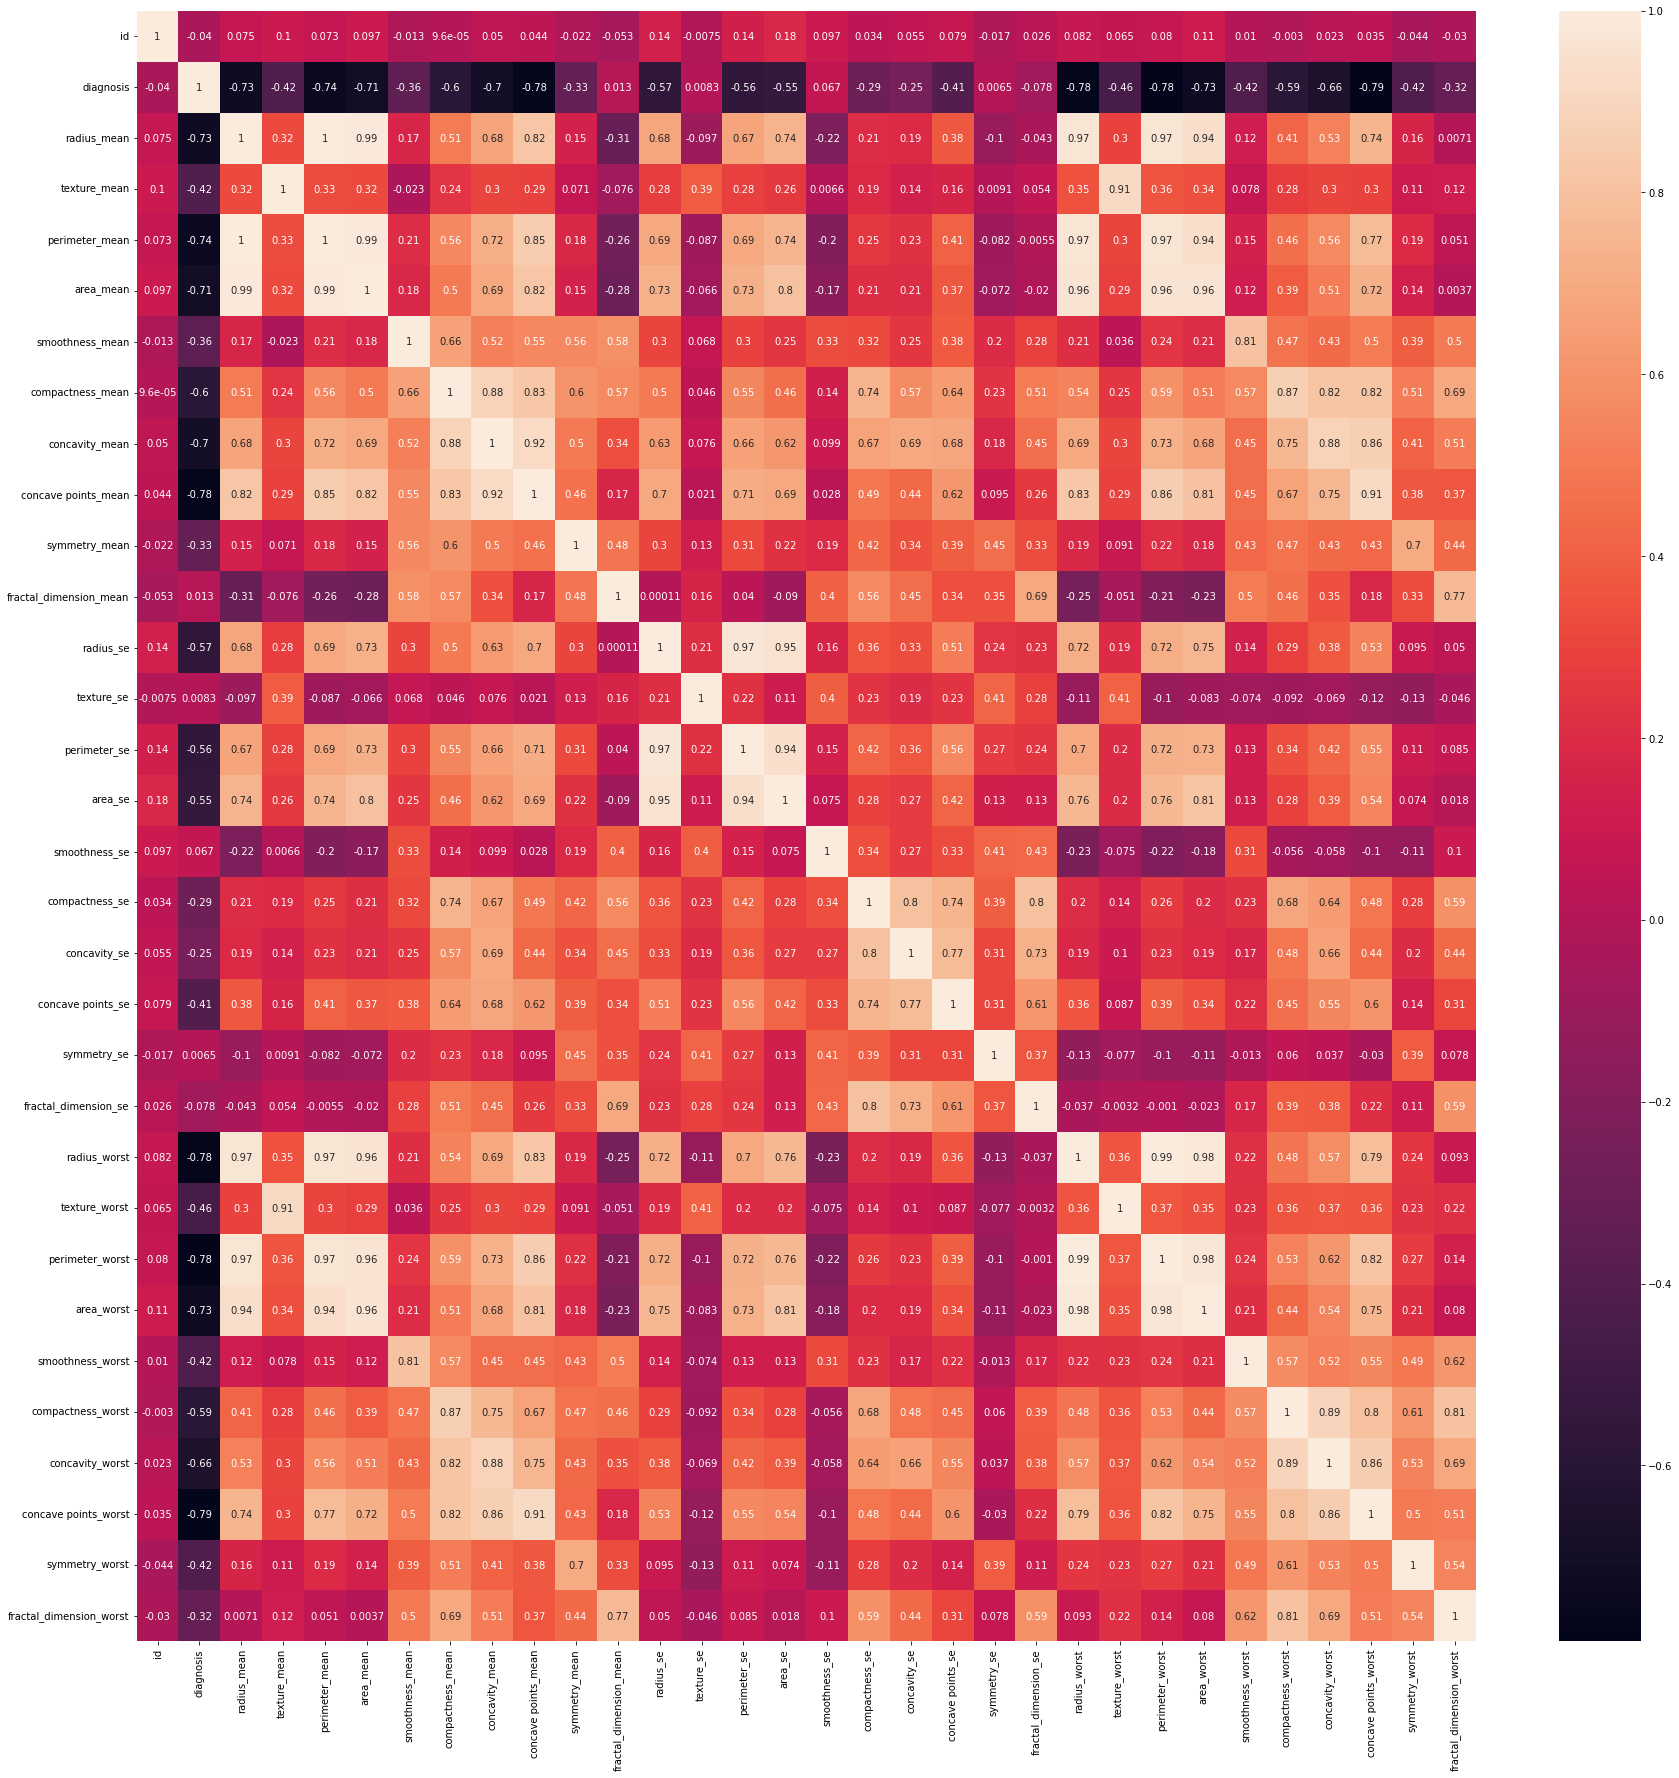

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.corr()["diagnosis"].sort_values()

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
id                        -0.039769
symmetry_se                0

In [18]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455, 1)
(114, 1)


## first model: Logistic Regression


In [22]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)


LogisticRegression()

In [23]:
Lr.score(x_train,y_train)

0.9560439560439561

In [24]:
logistic_pred=Lr.predict(x_test)
logistic_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [25]:
Lr.score(x_test,y_test)

0.956140350877193

In [26]:
from sklearn.metrics import mean_absolute_error
logistic_error=mean_absolute_error(logistic_pred,y_test)

In [27]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
cm1=confusion_matrix(y_test,logistic_pred)
print(cm1)

[[39  4]
 [ 1 70]]


<AxesSubplot:>

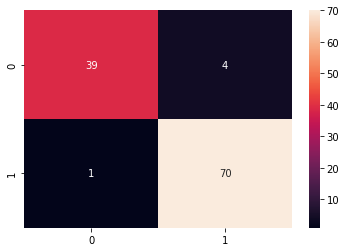

In [29]:
sns.heatmap(cm1, annot=True)


In [30]:
logistic_error

0.043859649122807015

## second model : Support Vector Machine

In [31]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [32]:
svc.score(x_train,y_train)

0.9142857142857143

In [33]:
svc_pred=svc.predict(x_test)
svc_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [34]:
svc.score(x_test,y_test)

0.9473684210526315

In [35]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [36]:
cm2=confusion_matrix(y_test,svc_pred)
print(cm2)

[[37  6]
 [ 0 71]]


<AxesSubplot:>

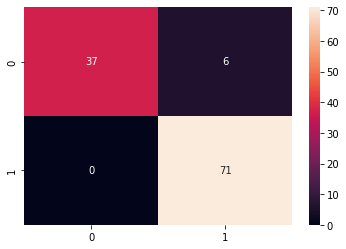

In [37]:
sns.heatmap(cm2, annot=True)


In [38]:
SVC_error=mean_absolute_error(svc_pred,y_test)
SVC_error

0.05263157894736842

## third model : random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
RandomForest.score(x_train,y_train)

1.0

In [41]:
RandomForest_pred=RandomForest.predict(x_test)
RandomForest_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [42]:
RandomForest.score(x_test,y_test)

0.9649122807017544

In [43]:
print(classification_report(RandomForest_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [44]:
cm3=confusion_matrix(RandomForest_pred,y_test)
cm3

array([[40,  1],
       [ 3, 70]], dtype=int64)

<AxesSubplot:>

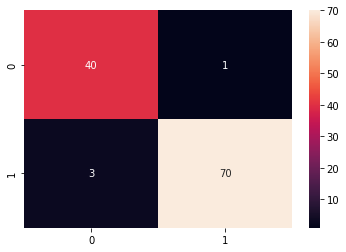

In [45]:
sns.heatmap(cm3,annot=True)

In [46]:
mean_absolute_error(RandomForest_pred,y_test)

0.03508771929824561

In [47]:
x_train.shape

(455, 30)

In [48]:
y_train.shape

(455, 1)

## Forth model : Neural Network


In [49]:
NNmodel=tf.keras.Sequential([
tf.keras.Input(shape=(30,)),
tf.keras.layers.Dense(units=128,activation="relu"),
tf.keras.layers.Dense(units=64,activation="relu"),
tf.keras.layers.Dense(units=1,activation="sigmoid")

])

In [50]:
NNmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [51]:
NNmodel.fit(x_train,y_train,epochs=800)

Epoch 1/800
15/15 [==============================] - 1s 3ms/step - loss: 8.6452 - accuracy: 0.5626
Epoch 2/800
15/15 [==============================] - 0s 2ms/step - loss: 1.2652 - accuracy: 0.8352
Epoch 3/800
15/15 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.8462
Epoch 4/800
15/15 [==============================] - 0s 2ms/step - loss: 0.8773 - accuracy: 0.8374
Epoch 5/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.9121
Epoch 6/800
15/15 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.9055
Epoch 7/800
15/15 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.8725
Epoch 8/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.9121
Epoch 9/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.9055
Epoch 10/800
15/15 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8967
Epoch 11/

15/15 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9341
Epoch 84/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9033
Epoch 85/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9451
Epoch 86/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9341
Epoch 87/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8901
Epoch 88/800
15/15 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8967
Epoch 89/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9429
Epoch 90/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9341
Epoch 91/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.9011
Epoch 92/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1713 - accuracy: 0.9341
Epoch 93/800


15/15 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9363
Epoch 165/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9385
Epoch 166/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9209
Epoch 167/800
15/15 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.9143
Epoch 168/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9341
Epoch 169/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9407
Epoch 170/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9187
Epoch 171/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9253
Epoch 172/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9429
Epoch 173/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9429
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.1645 - accuracy: 0.9451
Epoch 246/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9473
Epoch 247/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9473
Epoch 248/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9143
Epoch 249/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9582
Epoch 250/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9648
Epoch 251/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9319
Epoch 252/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9363
Epoch 253/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9604
Epoch 254/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9582
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9319
Epoch 327/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9560
Epoch 328/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.9538
Epoch 329/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9495
Epoch 330/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9648
Epoch 331/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9648
Epoch 332/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9604
Epoch 333/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9582
Epoch 334/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9560
Epoch 335/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9626
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9341
Epoch 408/800
15/15 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9582
Epoch 409/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 0.9670
Epoch 410/800
15/15 [==============================] - 0s 4ms/step - loss: 0.1377 - accuracy: 0.9560
Epoch 411/800
15/15 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9538
Epoch 412/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9253
Epoch 413/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9648
Epoch 414/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9495
Epoch 415/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9626
Epoch 416/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0868 - accuracy: 0.9648
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9692
Epoch 489/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9780
Epoch 490/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9429
Epoch 491/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9736
Epoch 492/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9670
Epoch 493/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9670
Epoch 494/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9495
Epoch 495/800
15/15 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9253
Epoch 496/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9451
Epoch 497/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9670
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9736
Epoch 570/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9692
Epoch 571/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9758
Epoch 572/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9846
Epoch 573/800
15/15 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9758
Epoch 574/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1389 - accuracy: 0.9451
Epoch 575/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9780
Epoch 576/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9495
Epoch 577/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9824
Epoch 578/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9714
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9780
Epoch 651/800
15/15 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9824
Epoch 652/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9780
Epoch 653/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.9692
Epoch 654/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9780
Epoch 655/800
15/15 [==============================] - 0s 5ms/step - loss: 0.1027 - accuracy: 0.9560
Epoch 656/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9714
Epoch 657/800
15/15 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9736
Epoch 658/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9780
Epoch 659/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9736
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 732/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9802
Epoch 733/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9824
Epoch 734/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9868
Epoch 735/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9692
Epoch 736/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9758
Epoch 737/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9868
Epoch 738/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9758
Epoch 739/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9758
Epoch 740/800
15/15 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9824
Epoc

In [52]:
NNmodel.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0824 - accuracy: 0.9737


[0.08239971846342087, 0.9736841917037964]

In [53]:
NN_pred=NNmodel.predict(x_test)
NN_pred

4/4 [==============================] - 0s 2ms/step


array([[6.60545826e-01],
       [2.21146573e-11],
       [1.91503277e-05],
       [9.99869823e-01],
       [9.99920249e-01],
       [2.57461668e-13],
       [1.87776752e-14],
       [7.23876525e-03],
       [8.94827008e-01],
       [9.96209383e-01],
       [7.65501440e-01],
       [2.88020765e-05],
       [8.76346409e-01],
       [1.42202899e-01],
       [9.98766243e-01],
       [4.99604394e-05],
       [9.79386866e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.80615886e-11],
       [3.54607940e-01],
       [9.92507756e-01],
       [6.90647769e-17],
       [9.99999285e-01],
       [9.99972880e-01],
       [9.99540567e-01],
       [9.99120355e-01],
       [1.00000000e+00],
       [9.96410489e-01],
       [1.07571861e-18],
       [9.99990165e-01],
       [9.99938905e-01],
       [9.98480618e-01],
       [9.31718111e-01],
       [9.99994040e-01],
       [9.98650968e-01],
       [6.04456454e-06],
       [9.93428469e-01],
       [2.48396720e-11],
       [8.79634857e-01],


In [54]:
NN_pred=NN_pred.round()

print(classification_report(NN_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        46
         1.0       0.96      1.00      0.98        68

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [55]:
cm4=confusion_matrix(NN_pred,y_test)
cm4

array([[43,  3],
       [ 0, 68]], dtype=int64)

<AxesSubplot:>

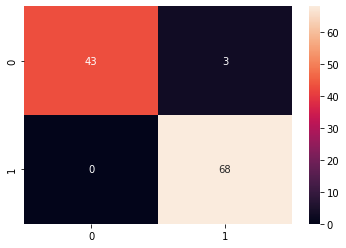

In [56]:
sns.heatmap(cm4,annot=True)